In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [2]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/cern-513_wash_in.csv'

In [3]:
df = pd.read_csv(path_to_data)

In [ ]:
df.head()

In [ ]:
df.tail()

In [6]:
df.isnull().sum()
df.dtypes

Days      object
Speed    float64
dtype: object

Text(0.5,1,'Aofa_Lond_in Link Speed Over Time In Hours')

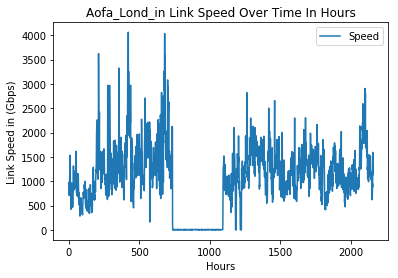

In [7]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Link Speed in (Gbps)')
plt.title('Aofa_Lond_in Link Speed Over Time In Hours')

In [8]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [9]:
df = df.set_index('Days')

In [10]:
average_daily_speed = df.resample('D').mean()

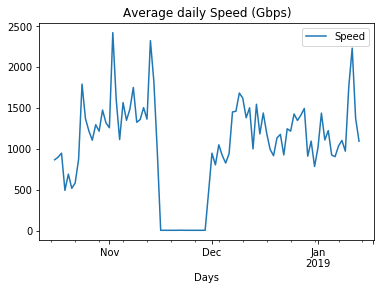

In [11]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

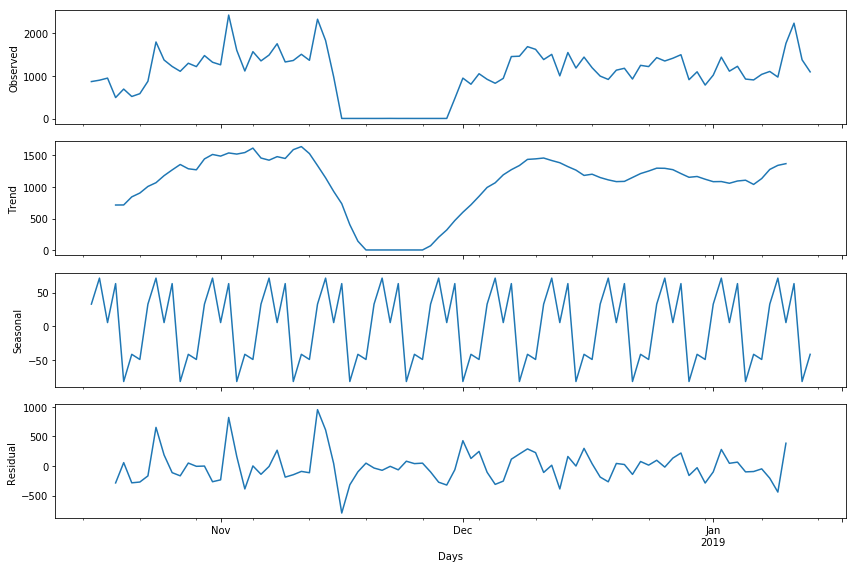

In [12]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [14]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [16]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1514.576220651987
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1281.9721681283474
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1265.3789493505176
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1036.0161299605916
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1274.276378540234
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1233.2198959367308
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1077.96837902472
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1037.1832435960828
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1411.3831795646195
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1202.9714202977777
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1203.963846588057
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:979.4343906710792
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1222.1520832918238
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1173.563991155878
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1030.8903510835082
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:980.7620422977849
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1291.366158278522
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1118.6942380754074
A

In [17]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:943.6056466197242

In [18]:
mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8417      0.071     11.864      0.000       0.703       0.981
ma.L1         -1.0001      0.367     -2.729      0.006      -1.718      -0.282
ma.S.L12      -1.3384      0.273     -4.911      0.000      -1.873      -0.804
sigma2      8.313e+04   4.38e-06    1.9e+10      0.000    8.31e+04    8.31e+04


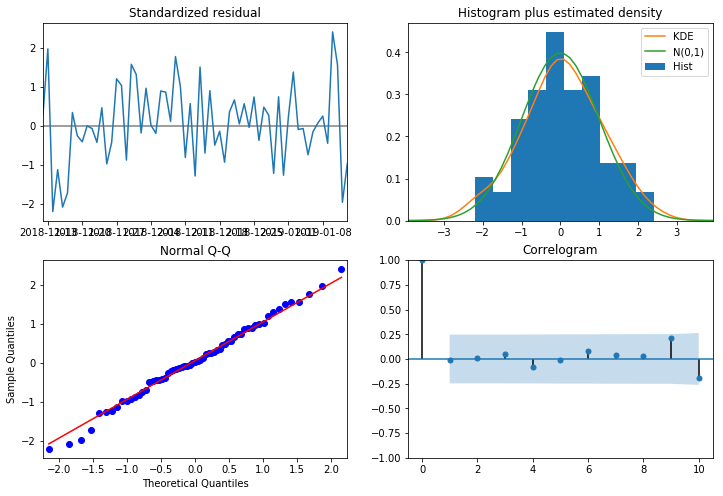

In [19]:
results.plot_diagnostics()
plt.show()